<a href="https://colab.research.google.com/github/DAVIDKSOUSA/DATA_SCIENCE/blob/master/Copy_of_S%C3%A9ries_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Séries Temporais 

##Extração e Visualização dos dados.

In [0]:
#Baixar as bibliotecas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from statsmodels.tsa.seasonal import seasonal_decompose

sns.set_style()
%matplotlib inline

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

from pandas_datareader import data as wb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


In [0]:
#Desconsiderar mensagem de warning.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [0]:
!pip install -U -q pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
df = pd.read_excel("/content/drive/My Drive/DataFrames/JBSS.xlsx")
df


,Data,Fechamento
0,2020-05-15,23.33
1,2020-05-14,24.45
2,2020-05-13,25.25
3,2020-05-12,23.74
4,2020-05-11,23.16
...,...,...
3240,2007-04-04,6.72
3241,2007-04-03,6.86
3242,2007-04-02,6.68
3243,2007-03-30,6.77


In [0]:
#df['Data'] = df['Data'].dt.strftime('"%m-%d-%Y"')
#df

In [0]:
df.index = pd.to_datetime(df["Data"], format="%m-%d-%Y")
df.drop("Data", axis=1, inplace=True)

df

,Fechamento
Data,
2020-05-15,23.33
2020-05-14,24.45
2020-05-13,25.25
2020-05-12,23.74
2020-05-11,23.16
...,...
2007-04-04,6.72
2007-04-03,6.86
2007-04-02,6.68


In [0]:
#f['Data'] = pd.to_datetime(df['Data'], format= )


In [0]:
#from datetime import datetime
#df["Data"] = pd.to_datetime(df["Data"], infer_datetime_format=True)

#index_data = df.set_index(["Data"])
#index_data.head()

#df.index = pd.to_datetime(df["Data"])
#df.drop(df["Data"], axis=1, inplace=True)
#df.head()

In [0]:
df.index

In [0]:
#Entradas.
#ativo = ["BOVA11.SA"]
#data_inicio = "2019-01-01"
#data_termino = "2019-12-31"

#Carregar o Dataset.
#df = wb.get_data_yahoo("BOVA11.SA", start="2018-01-01", end="2019-01-01", index = "Date")["Adj Close"]
#df = wb.DataReader( ativo, data_source = "yahoo", start = data_inicio, end = data_termino)["Adj Close"]
#df.head()

In [0]:
#Transformar o index em datetime.


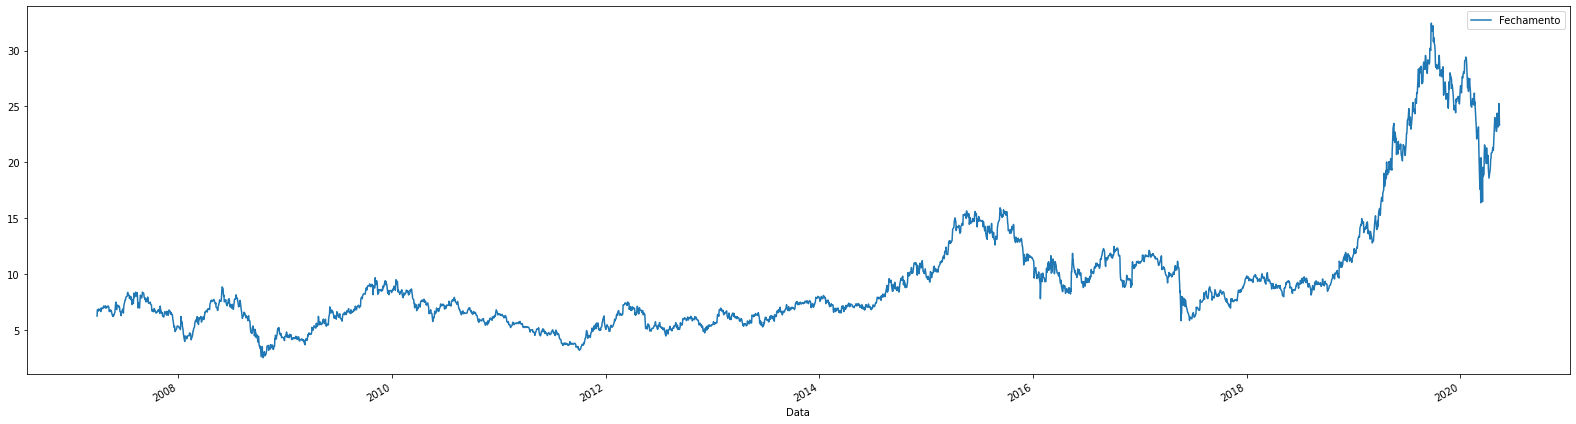

In [0]:
#Visualizacao do meu conjunto de dados.
df.plot(figsize = (22,6));
#df.rolling(9).mean().plot()
#ax.legend([ ativo , "MM9"])
#ax.set_title(ativo)
plt.tight_layout();


### 3. Como decompor uma Time Series em seus componentes

É possível decompor uma série temporal se você considerar a série como uma combinação aditiva ou multiplicativa dos seus componentes.

A biblioteca `stats`
from statsmodels.tsa.seasonal import seasonal_decompose

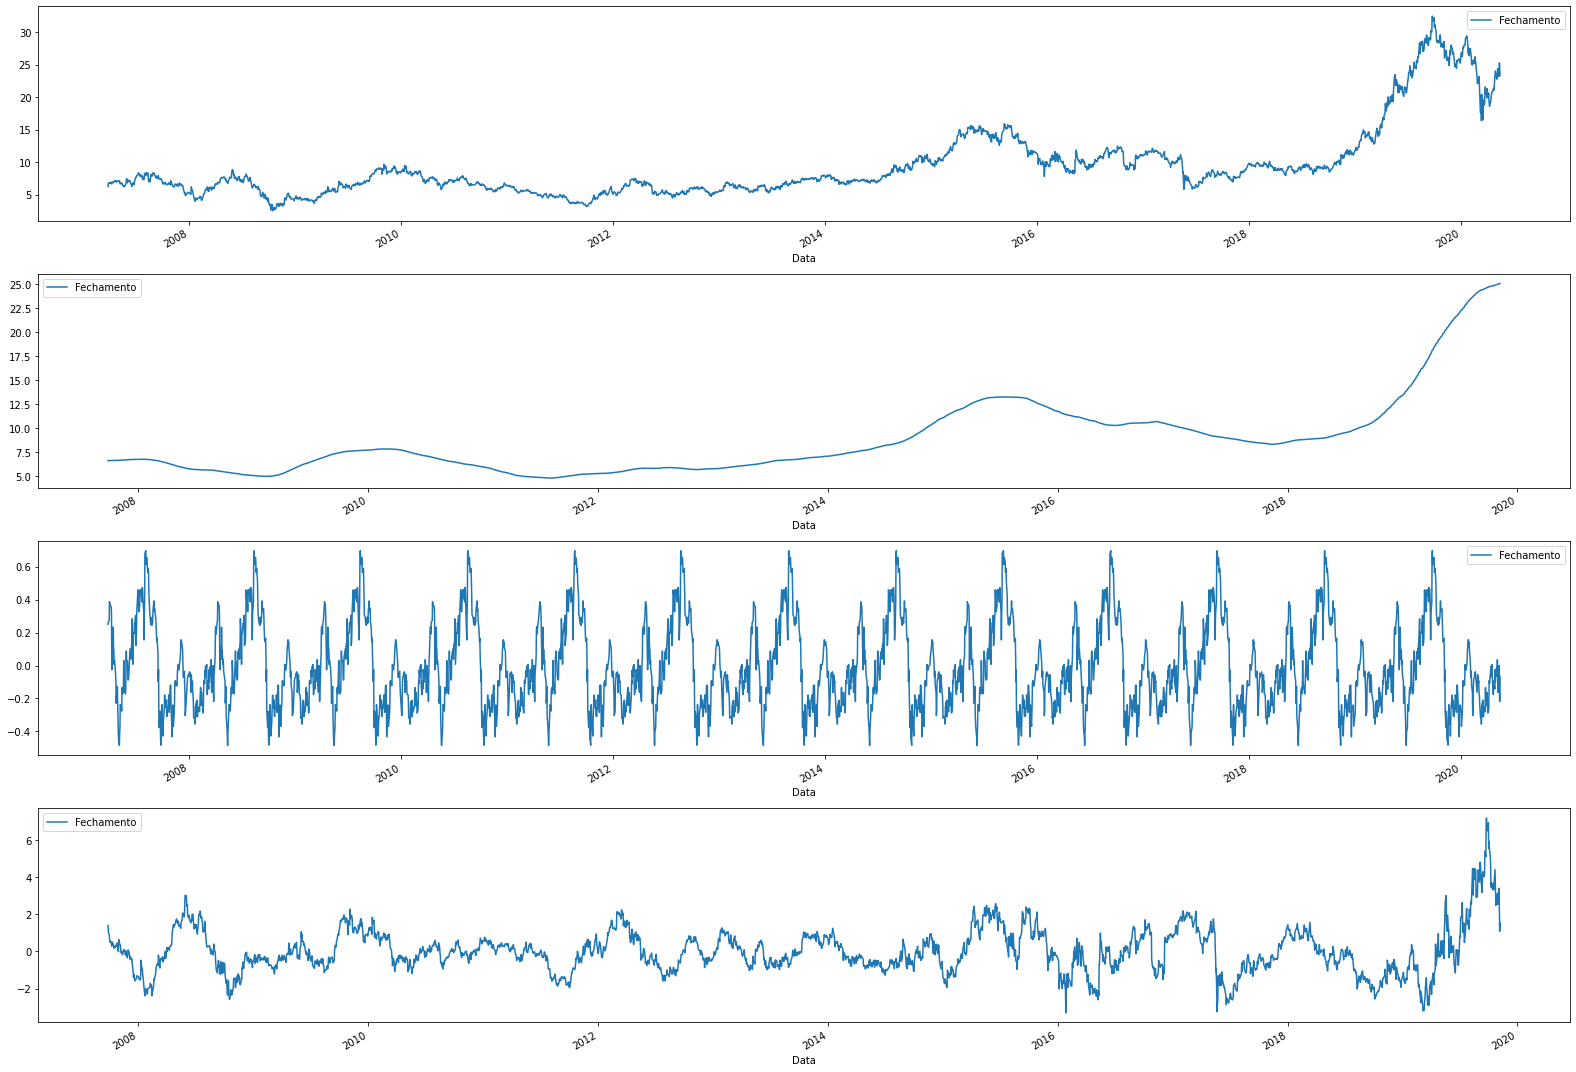

In [0]:
#Salvar a decomposicao em result.
result = seasonal_decompose(df, freq= 250)

#Plotar a decomposicao
#result.plot();
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(22,15))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
plt.tight_layout()
